# Released under MIT License

Copyright (c) 2013 Mark Otto.

Copyright (c) 2017 Andrew Fong.

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.

In [1]:
import os
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from keras.utils import load_img, img_to_array
from keras.callbacks import EarlyStopping
from keras.applications import MobileNetV2

import matplotlib.pyplot as plt

In [2]:
image_size = (256, 256)
batch_size = 32
data_dir = '../../classification/animal/data/'

In [ ]:
ds = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="training",
    seed=1,
    image_size=image_size,
    batch_size=batch_size,
    label_mode='int' 
    )

class_names = ds.class_names


Found 3000 files belonging to 3 classes.
Using 2400 files for training.


2025-05-10 22:54:59.895992: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1 Pro
2025-05-10 22:54:59.896037: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 16.00 GB
2025-05-10 22:54:59.896040: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 5.33 GB
2025-05-10 22:54:59.896059: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2025-05-10 22:54:59.896071: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [ ]:
for X_batch, y_batch in ds.take(1):
    print("Форма X:", X_batch.shape)     # Tensor з зображеннями
    print("Форма y:", y_batch.shape)     # Tensor з мітками
    print("X[2999]:", X_batch[0].numpy())   # Перше зображення як масив
    print("y[2999]:", y_batch[0].numpy())   # Мітка для цього зображення


Форма X: (32, 256, 256, 3)
Форма y: (32,)
X[2999]: [[[100. 102.  89.]
  [ 74.  76.  63.]
  [ 86.  88.  75.]
  ...
  [ 32.  42.  41.]
  [ 68.  79.  81.]
  [102. 113. 115.]]

 [[ 39.  41.  28.]
  [ 58.  60.  47.]
  [ 79.  81.  68.]
  ...
  [ 34.  44.  43.]
  [ 69.  80.  82.]
  [103. 114. 116.]]

 [[ 44.  46.  33.]
  [ 38.  40.  27.]
  [ 37.  39.  26.]
  ...
  [ 36.  46.  45.]
  [ 69.  80.  82.]
  [108. 119. 121.]]

 ...

 [[ 69.  81.  43.]
  [ 67.  79.  41.]
  [ 74.  89.  48.]
  ...
  [ 34.  63.   9.]
  [ 44.  73.  19.]
  [ 49.  78.  24.]]

 [[ 57.  69.  31.]
  [ 67.  79.  41.]
  [ 64.  79.  38.]
  ...
  [ 38.  65.  12.]
  [ 49.  76.  23.]
  [ 48.  75.  22.]]

 [[ 53.  65.  27.]
  [ 68.  80.  42.]
  [ 40.  55.  14.]
  ...
  [ 49.  76.  23.]
  [ 62.  86.  34.]
  [ 55.  79.  27.]]]
y[2999]: 1


2025-05-10 22:59:24.121591: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


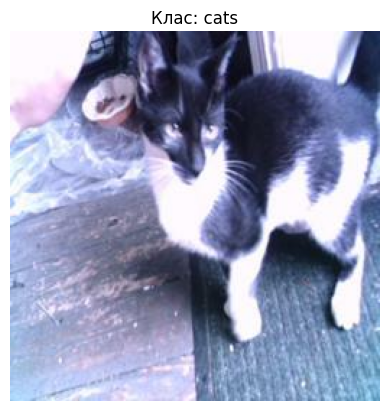

2025-05-10 23:00:00.117726: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [23]:
import matplotlib.pyplot as plt


for X_batch, y_batch in ds.take(1):
    plt.imshow(X_batch[0].numpy().astype("uint8"))
    plt.title(f"Клас: {class_names[y_batch[0].numpy()]}")
    plt.axis("off")
    plt.show()


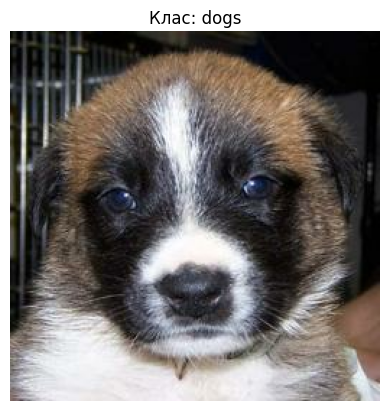

2025-05-11 15:59:02.909281: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [25]:
for X_batch, y_batch in ds.take(1):
    plt.imshow(X_batch[1].numpy().astype("uint8"))
    plt.title(f"Клас: {class_names[y_batch[1].numpy()]}")
    plt.axis("off")
    plt.show()


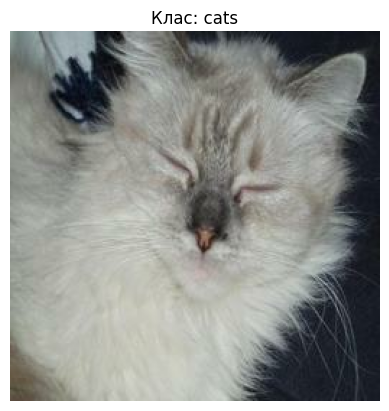

2025-05-11 15:59:39.491476: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [29]:
for X_batch, y_batch in ds.take(1):
    plt.imshow(X_batch[3].numpy().astype("uint8"))
    plt.title(f"Клас: {class_names[y_batch[3].numpy()]}")
    plt.axis("off")
    plt.show()


In [ ]:
# import os
# import numpy as np
# from keras.preprocessing import image
# from keras.applications.efficientnet import preprocess_input
# from sklearn.preprocessing import LabelBinarizer
# from tqdm import tqdm

In [ ]:
# def new_func():
#     X = []
#     y = []

#     class_names = sorted(os.listdir(data_dir))  

#     for label in class_names:
#         class_dir = os.path.join(data_dir, label)
#         if not os.path.isdir(class_dir):
#             continue
#         for file in tqdm(os.listdir(class_dir), desc=f"Loading {label}"):
#             img_path = os.path.join(class_dir, file)
#             try:
#                 img = image.load_img(img_path, target_size=image_size)
#                 img_array = image.img_to_array(img)
#                 img_array = preprocess_input(img_array)  
#                 X.append(img_array)
#                 y.append(label)
#             except Exception as e:
#                 print(f'Error: {img_path} failed to load -> {e}')
#     X_np = np.array(X, dtype='float32')
#     y_np_raw = np.array(y)

#     encoder = LabelBinarizer()
#     y_np = encoder.fit_transform(y_np_raw)

#     print("X shape:", X_np.shape)
#     print("y shape:", y_np.shape)
#     print(encoder.classes_)

# new_func()

In [ ]:
0